In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [175]:
#1) Load House Loan Dataset
data=pd.read_csv("loan_data.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data.isnull()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
307507,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
307508,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307509,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [177]:
#@2) Check the null value of the dataset
if data.isnull().values.any():
    data=data.fillna(0)

In [9]:
payer_data={'target':[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]}

In [10]:
df=pd.DataFrame(payer_data)

In [11]:
#Calculate the percentage of defaults

In [12]:
default_count=df['target'].sum()

In [13]:
total_count=df['target'].count()

In [14]:
default_percentage=(default_count/total_count)*100

In [179]:
#@3)Print the percentage of default to the payer of the dataset of Target Column 
print(f"percentage of default to a payer:{default_percentage:.2f}%")

percentage of default to a payer:11.89%


In [16]:
pip install pandas scikit-learn imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter

In [18]:
#4)Generate Imbalanced dataset to balance using SMOTE Techniques

In [19]:
X,y=make_classification(n_samples=300000, n_features=122, n_informative=10, n_redundant=20, n_clusters_per_class=1, weights=[0.99],flip_y=0, random_state=32)

In [20]:
#Convert to dataframe

In [21]:
df=pd.DataFrame(X)
df['target']=y

In [22]:
#Check the distribution of the target column

In [23]:
print("Original target distribution:",Counter(df['target']))

Original target distribution: Counter({0: 297000, 1: 3000})


In [24]:
#Separate Features and target

In [25]:
X=df.drop(columns=['target'])
y=df['target']

In [181]:
#4)Apply SMOTE to balance the dataset

In [27]:
smote=SMOTE(random_state=42)
X_res, y_res=smote.fit_resample(X,y)

  File "/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


In [28]:
print("Resampled target distribution:", Counter(y_res))

Resampled target distribution: Counter({0: 297000, 1: 297000})


In [29]:
#Convert resampled data back to DataFrame if needed

In [30]:
df_res=pd.DataFrame(X_res, columns=df.columns[:-1])
df_res['target']=y_res

In [31]:
print(df_res.head())

          0         1         2         3         4          5         6  \
0  0.099601 -0.885639 -1.042154  0.128197  0.554094   0.326773 -1.301683   
1  0.279481 -2.286624 -3.896380  1.510656  0.099589  -2.171428  0.497044   
2 -0.034932  0.016330 -8.855405  0.107612  2.865159  10.101124 -0.142381   
3 -1.148379  0.875621 -1.219577 -0.333664 -1.150961  -1.072768  1.048159   
4 -0.095453 -1.777486  0.439476  1.642841  0.776541  -4.156374 -0.040815   

          7         8         9  ...       113       114       115       116  \
0 -1.012390 -1.389797  1.635724  ...  0.553087 -1.532600 -4.551721 -1.447281   
1  0.585846 -0.597201  0.801230  ... -0.787129  0.632428 -0.269812  1.272961   
2 -0.286210  0.068513 -0.128725  ...  0.418178  0.648975  1.484380 -0.001317   
3  0.180624  0.001161  0.198996  ...  0.879696  0.435712 -3.630576 -0.650044   
4  1.823826  1.085396  0.084128  ...  0.739507  1.086479  1.611635  0.395601   

        117       118       119       120       121  target  


In [32]:
pip install pandas matplotlib seaborn scikit-learn imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter

In [34]:
#Function to plot the distribution of the target columns

In [35]:
def plot_target(data, title):
    sns.countplot(x='target', data=data)
    plt.title(title)
    plt.xlabel('Target')
    plt.ylabel('count')
    plt.show()
    

In [36]:
#5)Plot the original target distribution (imbalanced data)

Original target distribution: Counter({0: 297000, 1: 3000})


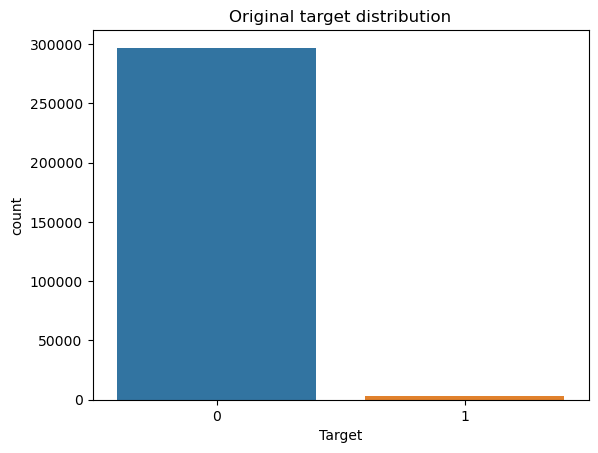

In [37]:
print("Original target distribution:", Counter(df['target']))
plot_target(df, 'Original target distribution')

In [183]:
#5)print resampled target distribution (balanced data)

Resampled target distribution: Counter({0: 297000, 1: 297000})


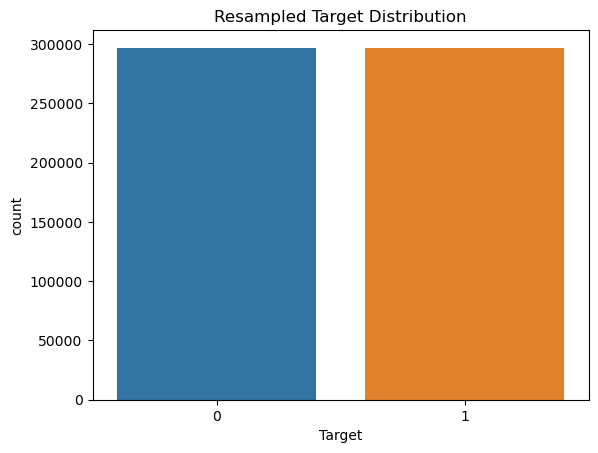

In [39]:
print("Resampled target distribution:", Counter(df_res['target']))
plot_target(df_res, 'Resampled Target Distribution')

In [40]:
#Build the model

In [41]:
pip install --upgrade tensorflow

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [42]:
import tensorflow as tf

2024-08-20 15:31:46.188491: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-20 15:31:46.315519: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-20 15:31:46.453262: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-20 15:31:46.556613: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-20 15:31:46.585966: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-20 15:31:46.782961: I tensorflow/core/platform/cpu_feature_gu

In [43]:
X

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,0.099601,-0.885639,-1.042154,0.128197,0.554094,0.326773,-1.301683,-1.012390,-1.389797,1.635724,...,3.983737,0.553087,-1.532600,-4.551721,-1.447281,0.359253,-0.461999,3.681493,-0.929352,0.243305
1,0.279481,-2.286624,-3.896380,1.510656,0.099589,-2.171428,0.497044,0.585846,-0.597201,0.801230,...,1.151651,-0.787129,0.632428,-0.269812,1.272961,-0.129918,0.981106,-0.491888,1.273196,0.878440
2,-0.034932,0.016330,-8.855405,0.107612,2.865159,10.101124,-0.142381,-0.286210,0.068513,-0.128725,...,1.186226,0.418178,0.648975,1.484380,-0.001317,-0.175625,0.512030,-3.069178,0.577182,5.756022
3,-1.148379,0.875621,-1.219577,-0.333664,-1.150961,-1.072768,1.048159,0.180624,0.001161,0.198996,...,1.547447,0.879696,0.435712,-3.630576,-0.650044,-0.758954,-0.022736,0.661540,-0.820212,-0.520887
4,-0.095453,-1.777486,0.439476,1.642841,0.776541,-4.156374,-0.040815,1.823826,1.085396,0.084128,...,0.372868,0.739507,1.086479,1.611635,0.395601,1.170998,-0.573951,2.193445,-0.705949,1.367909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0.310628,1.691243,-6.744491,-0.570905,4.304270,-0.322161,0.145720,-1.634183,1.968514,-2.363734,...,1.803967,2.204625,-1.173771,2.711835,2.362742,-1.216609,1.071622,-2.407769,-1.745235,1.586472
299996,0.459702,-1.494299,0.201245,0.383053,-1.214357,1.094535,-1.018152,-0.302736,0.975444,0.802727,...,0.687774,-1.265709,-1.037902,-0.628705,0.118509,1.978297,-0.247895,3.465289,1.036465,-0.762351
299997,-0.012022,-0.947057,-4.164921,0.376558,-2.098132,5.959253,-0.209913,-0.376317,0.953879,-0.273427,...,0.361373,-0.685932,-0.567374,-1.317093,-0.204342,1.338415,-0.698763,1.346392,-1.357223,1.047218
299998,1.594861,-0.501085,-3.948296,0.326869,0.000149,-5.195067,0.013941,-0.089081,0.925266,0.237759,...,2.133537,0.881400,-0.418108,-1.586530,-0.255287,-1.043379,1.225297,-4.487893,-1.183841,1.322871


In [44]:
y

0         0
1         0
2         0
3         0
4         0
         ..
299995    0
299996    0
299997    0
299998    0
299999    0
Name: target, Length: 300000, dtype: int64

In [45]:
#Normalizing the data 

In [46]:
import numpy as np

In [47]:
from tensorflow.keras.datasets.cifar10 import load_data

In [48]:
(X_train, y_train), (X_test, y_test)=load_data()

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [50]:
np.max(X_train), np.min(X_train)

(255, 0)

In [51]:
np.max(X_train), np.min(X_train)

(255, 0)

In [52]:
X_train_normalize=X_train/255

In [53]:
X_train_normalize

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [54]:
X_test_normalize = X_test/255

In [55]:
X_test_normalize

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [185]:
#One hot encoding target
#6) Encode the column required for the model

In [57]:
num_classes=10

In [58]:
y_train_encoded=tf.keras.utils.to_categorical(y_train, num_classes)

In [59]:
y_train_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [60]:
y_test_encoded=tf.keras.utils.to_categorical(y_test, num_classes)

In [61]:
y_test_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [62]:
y_train_encoded[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [63]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [64]:
import tensorflow as tf

In [65]:
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout,Flatten, Dense
import shutil

In [66]:
from logging import Filterer
model_0=Sequential()
model_0.add(Conv2D(filters=1,kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 1)      │            28 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28 (112.00 B)

 Trainable params: 28 (112.00 B)

 Non-trainable params: 0 (0.00 B)

In [67]:
model_0=Sequential()
model_0.add(Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model_0.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model_1=Sequential()
model_1.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(32,32,3),padding="same"))
model_1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu',padding="same"))
model_1.add(MaxPool2D(pool_size=(2,2)))

model_1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same"))
model_1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same"))
model_1.add(MaxPool2D(pool_size=(2,2)))

model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(10, activation='softmax'))
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model_1.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
history=model_1.fit(X_train_normalize,y_train_encoded,validation_data=(X_test_normalize, y_test_encoded),batch_size=32, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.3973 - loss: 1.6475 - val_accuracy: 0.6215 - val_loss: 1.0903
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.6687 - loss: 0.9375 - val_accuracy: 0.7030 - val_loss: 0.8552
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.7393 - loss: 0.7461 - val_accuracy: 0.7368 - val_loss: 0.7557
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.7805 - loss: 0.6197 - val_accuracy: 0.7253 - val_loss: 0.7965
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 55ms/step - accuracy: 0.8167 - loss: 0.5245 - val_accuracy: 0.7452 - val_loss: 0.7558
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.8476 - loss: 0.4360 - val_accuracy: 0.7442 - val_loss: 0.7974
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 58ms/step - accuracy: 0.8763 - loss: 0.3545 - val_accuracy: 0.7435 - val_loss: 0.8541
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.8971 -

ValueError: ' upper left' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

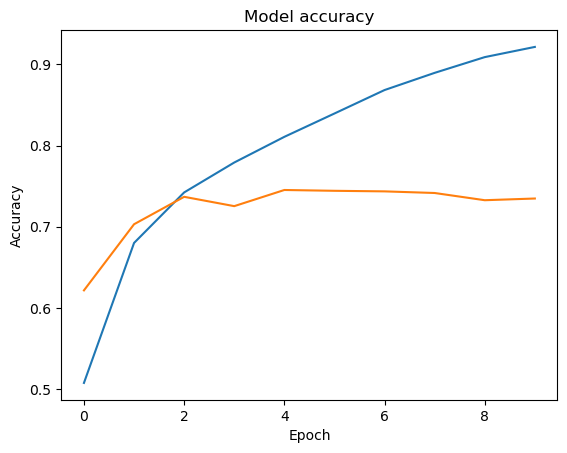

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc=' upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

In [91]:
data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [95]:
#Building Logistic Regression Model

In [97]:
import statsmodels.formula.api as sm

In [99]:
logistics1=sm.logit(formula='TARGET~SK_ID_CURR+NAME_CONTRACT_TYPE+CODE_GENDER+FLAG_OWN_CAR+FLAG_OWN_REALTY+CNT_CHILDREN+AMT_INCOME_TOTAL+AMT_CREDIT+AMT_ANNUITY+AMT_REQ_CREDIT_BUREAU_YEAR', data=data)

In [100]:
fitted1=logistics1.fit()
fitted1.summary()

         Current function value: 0.276752
         Iterations: 35


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 TARGET   No. Observations:               307511
Model:                          Logit   Df Residuals:                   307499
Method:                           MLE   Df Model:                           11
Date:                Tue, 20 Aug 2024   Pseudo R-squ.:                 0.01352
Time:                        15:46:22   Log-Likelihood:                -85104.
converged:                      False   LL-Null:                       -86271.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -2.3301      0.027    -86.135      0.000      -2.383      -2.277
NAME_CONTRACT_TYPE[T.Revolving loans]    -0.5267      0.027    -19.173      0.000      -0.581      -0.473
CODE_GENDER[T.M]                          0.5143      0.015     35.351      0.000       0.486       0.543
CODE_GENDER[T.XNA]                      -15.9106   6503.233     -0.002      0.998   -1.28e+04    1.27e+04
FLAG_OWN_CAR[T.Y]                        -0.3460      0.016    -22.177      0.000      -0.377      -0.315
FLAG_OWN_REALTY[T.Y]                     -0.0207      0.014     -1.436      0.151      -0.049       0.008
SK_ID_CURR                            -7.152e-08   6.47e-08     -1.106      0.269   -1.98e-07    5.52e-08
CNT_CHILDREN                              0.1046      0.009     11.966      0.000       0.087       0.122
AMT_INCOME_TOTAL                      -1.075e-07   7.82e-08     -1.374      0.170   -2.61e-07    4.59e-08
AMT_CREDIT                            -4.376e-07   2.71e-08    -16.159      0.000   -4.91e-07   -3.85e-07
AMT_ANNUITY                            3.783e-06   7.52e-07      5.033      0.000    2.31e-06    5.26e-06
AMT_REQ_CREDIT_BUREAU_YEAR                0.0089      0.004      2.500      0.012       0.002       0.016
=========================================================================================================
"""

In [103]:
##Predicting Value

In [105]:
predicted_value1=fitted1.predict(data[["SK_ID_CURR"]+["NAME_CONTRACT_TYPE"]+["CODE_GENDER"]+["FLAG_OWN_CAR"]+["FLAG_OWN_REALTY"]+["CNT_CHILDREN"]+["AMT_ANNUITY"]+["AMT_INCOME_TOTAL"]+["AMT_CREDIT"]+["AMT_REQ_CREDIT_BUREAU_YEAR"]])
predicted_value1[1:10]

1    0.057472
2    0.059689
3    0.083407
4    0.119366
5    0.123912
6    0.042022
7    0.060730
8    0.064205
9    0.076885
dtype: float64

In [107]:
import numpy as np
threshold=0.8
predicted_class1=np.zeros(predicted_value1.shape)
predicted_class1[predicted_value1>threshold]=1
predicted_class1

array([0., 0., 0., ..., 0., 0., 0.])

In [187]:
#Confusion matrix, accuracy, sensitivity and specificity
#@7)Calculate Sensitivity Metrics

In [189]:
from sklearn.metrics import confusion_matrix
cm1= confusion_matrix(data[['TARGET']], predicted_class1)
print('confusion matrix: \n', cm1)

total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print('Accuracy:', accuracy1)
sensitivity1 =cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('sensitivity:', sensitivity1)

specificity1=cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity:', specificity1)

confusion matrix: 
 [[282686      0]
 [ 24825      0]]
Accuracy: 0.9192711805431351
sensitivity: 1.0
Specificity: 0.0


In [123]:
from sklearn.metrics import roc_auc_score

In [191]:
#Calculate ROC Curve
#8)Calculate the area under the receiver Operating Characteristic Curve

In [127]:
y_pred_prob=model_1.predict(X_test)[:,1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [139]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression 

In [143]:
X, y=make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

In [145]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [149]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [151]:
y_probs=model.predict_proba(X_test)[:,1]

In [153]:
fpr,tpr, thresholds=roc_curve(y_test, y_probs)

In [155]:
roc_auc=auc(fpr, tpr)

In [157]:
print(f'Area under the ROC Curve(AUC): {roc_auc:.2f}')

Area under the ROC Curve(AUC): 0.91


In [161]:
roc_auc_score_value=roc_auc_score(y_test, y_probs)

In [163]:
print(f'Area under the ROC Curve (roc_auc_score):{roc_auc_score_value:.2f}')

Area under the ROC Curve (roc_auc_score):0.91


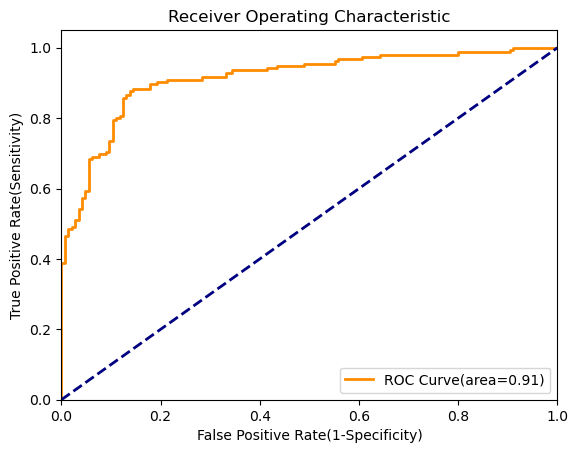

In [173]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()